# Free stock market APIs

주식 시장 데이터 API는 현재 시장에서 거래되는 금융 자산에 대한 실시간 또는 과거 데이터를 제공합니다. 이러한 API는 일반적으로 공개 주식, ETF, ETN의 가격을 제공합니다.  
이러한 데이터는 거래 전략을 수립하고 시장을 모니터링하는 기반이 되는 기술 지표를 생성하는 데 사용할 수 있습니다. 

# 1. 야후 파이낸스
문서: [yfinance](https://github.com/ranaroussi/yfinance)  
tutorial: https://aroussi.com/post/python-yahoo-finance

In [3]:
!pip install yfinance # DOS command 입력하듯이 yfinance을 install해준다.

In [4]:
import matplotlib.pyplot as plt

import yfinance as yf

In [9]:
df = yf.download('AAPL', start='2022-01-01', progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281021,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449341,86709100


In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100
2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900
2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100


- 미국 주식

- 한국 주식

In [12]:
df = yf.download('005930.KS', start='2023-01-01')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-07,67700.0,69200.0,67600.0,68500.0,68500.0,10968505
2023-08-08,69000.0,69100.0,67400.0,67600.0,67600.0,14664709
2023-08-09,68000.0,69600.0,67900.0,68900.0,68900.0,17259673
2023-08-10,68300.0,68500.0,67800.0,68000.0,68000.0,10227311
2023-08-11,68400.0,68800.0,67500.0,67500.0,67500.0,9781038


# 2. Pandas data_reader & FinanceDataReader

pandas-datareader 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다. 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다.

FinanceDataReader는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.

- 종목 코드  
거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500  


- 가격 데이터  
해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등  
국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등  
각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)  
환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율  
암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)  

In [13]:
!pip install finance-datareader
# !pip install pandas_datareader

In [30]:
import pandas_datareader as data_reader
import FinanceDataReader as fdr
import datetime

start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 8, 11)
start, end

(datetime.datetime(2023, 1, 1, 0, 0), datetime.datetime(2023, 8, 11, 0, 0))

- 미국 주식

In [31]:
stock = fdr.DataReader('AAPL', start=start, end=end)
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.744583,115799700
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100
2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900


- 한국 주식

In [32]:
stock = fdr.DataReader('005930', start=start, end=end)
# 셀트리온 주식
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-08-07,67700,69200,67600,68500,10968505,0.002928
2023-08-08,69000,69100,67400,67600,14664709,-0.013139
2023-08-09,68000,69600,67900,68900,17259673,0.019231
2023-08-10,68300,68500,67800,68000,10227311,-0.013062
2023-08-11,68400,68800,67500,67500,9629620,-0.007353


<Axes: xlabel='Date'>

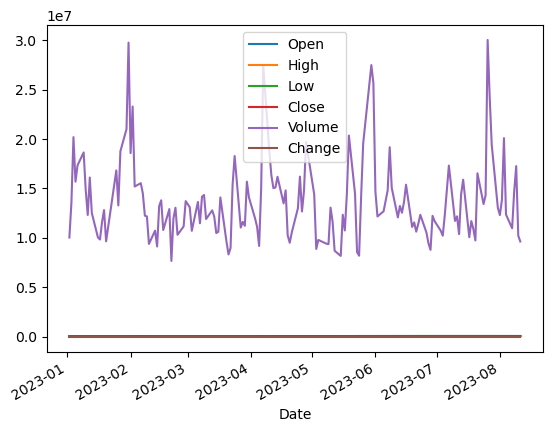

In [33]:
stock.plot()

- 원-달러 환율

In [22]:
# !pip install -U finance-datareader
# finance-datareader 모듈 설치

In [25]:
import FinanceDataReader as fdr
df = fdr.DataReader('USD/KRW', '2023')
print(df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-02  1260.910034  1273.930054  1256.550049  1260.910034  1260.910034   
2023-01-03  1270.099976  1278.969971  1264.390015  1270.099976  1270.099976   
2023-01-04  1279.079956  1279.719971  1267.560059  1279.079956  1279.079956   
2023-01-05  1271.079956  1278.229980  1265.739990  1271.079956  1271.079956   
2023-01-06  1274.180054  1274.180054  1253.010010  1274.180054  1274.180054   
...                 ...          ...          ...          ...          ...   
2023-08-08  1307.750000  1321.750000  1305.099976  1307.750000  1307.750000   
2023-08-09  1316.670044  1321.780029  1309.540039  1316.670044  1316.670044   
2023-08-10  1313.640015  1319.500000  1305.599976  1313.640015  1313.640015   
2023-08-11  1318.329956  1331.260010  1316.430054  1318.329956  1318.329956   
2023-08-12  1330.280029  1330.280029  1330.280029  1

In [26]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-08,1307.750000,1321.750000,1305.099976,1307.750000,1307.750000,0
2023-08-09,1316.670044,1321.780029,1309.540039,1316.670044,1316.670044,0
2023-08-10,1313.640015,1319.500000,1305.599976,1313.640015,1313.640015,0
2023-08-11,1318.329956,1331.260010,1316.430054,1318.329956,1318.329956,0
2023-08-12,1330.280029,1330.280029,1330.280029,1330.280029,1330.280029,0


<Axes: xlabel='Date'>

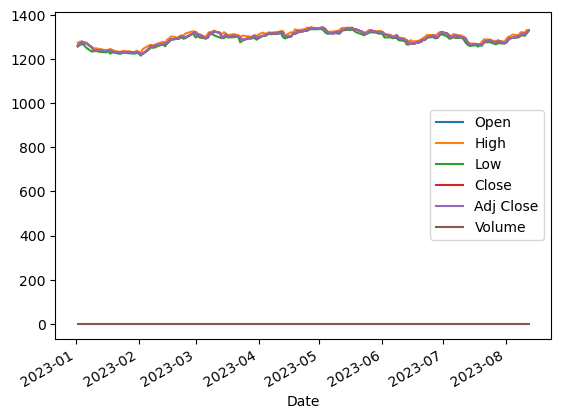

In [27]:
df.plot()

- DataReader